# Finite element basic and not optimized  Python implementation

In [23]:
from numpy import * 
from scipy import *
from scipy.linalg import *


import matplotlib.pyplot as plt
import matplotlib.tri as tri


## Triangulation refinement

This is the function that handles the red refinement for our triangulations. The inputs are the coordinates for vertices, the triangles and the boundary edges. It returns those same things after one iteration of the refinement. I will explain more about this in the examples.

In [24]:
def red_refinement(x,y,triangles,boundary):
####################################################
# Red refinement for triangulations
# New traingle from middle points of edges.
####################################################
#INPUT
####################################################
# x  ................... Vertices x coordinates
# y  ................... Vertices x coordinates
# triangles ............ For each triangle the node 
#                        numbers of the vertices e.g. 
#                        [1,2,3].
# boundary ............. For each boundary edge the 
#                        node numbers of the vertices
#                         e.g.[1,2,3].
####################################################
#OUTPUT
####################################################
# x  ................... Same as input after one
# y  ................... iteration of the red 
# triangles ............ refinement.
# boundary .............
####################################################
    coordinates = vstack((x,y))
    
    ## Boundary Edges
    x_end = (x[-1]+x[0])/2
    y_end = (y[-1]+y[0])/2

    xm = []
    ym = []
    for i in range(len(x)-1):
        xm.extend([(x[i]+x[i+1])/2 ])
        ym.extend([(y[i]+y[i+1])/2 ])

    xm.extend([x_end]) 
    ym.extend([y_end]) 

    edge_x = []
    edge_y = [] 
    for i in range(-1,len(x)-1):
        edge_x.extend([x[i],xm[i],xm[i],x[i+1]])
        edge_y.extend([y[i],ym[i],ym[i],y[i+1]])

    Boundary = vstack((edge_x,edge_y))


    ## New triangles 
    Triangles = []
    Coordinates = []
    for j in range(len(triangles)):

        tx = coordinates[:,triangles[j]][0,:]
        ty = coordinates[:,triangles[j]][1,:]           

        ntx = vstack(([tx[0], (tx[0] + tx[1])/2, (tx[0] + tx[2])/2],
        [tx[1], (tx[1] + tx[2])/2, (tx[1] + tx[0])/2],
        [tx[2], (tx[2] + tx[0])/2, (tx[2] + tx[1])/2]))

        nty = vstack(([ty[0], (ty[0] + ty[1])/2, (ty[0] + ty[2])/2],
        [ty[1], (ty[1] + ty[2])/2, (ty[1] + ty[0])/2],
        [ty[2], (ty[2] + ty[0])/2, (ty[2] + ty[1])/2]))

        t0 = vstack((ntx[0,:],nty[0,:]))
        t1 = vstack((ntx[1,:],nty[1,:]))
        t2 = vstack((ntx[2,:],nty[2,:]))
        t3 = vstack((ntx[:,2],nty[:,2]))

        Triangles.extend((t0,t1,t2,t3))

    ## New coordinates
    for i in range(size(Triangles,0)):
        coordinates = concatenate((coordinates,Triangles[i]),axis=1)

    Coordinates = unique(coordinates ,axis=1) 

    
    ## Coordinates to Vertices for boundary
    boundary_list = []
    for i in range(size(Boundary,1)):
            for k in range(size(Coordinates,1)):
                if (Boundary[:,i] == Coordinates[:,k]).all():
                    boundary_list.extend([k])

    Boundary = [boundary_list[x:x+2] for x in range(0, len(boundary_list),2)]   

    
    ## Coordinates to Vertices for triangles
    triangles_list =[]
    for i in range(len(Triangles)):
        T =[0,0,0]
        for j in [0,1,2]:
            for k in range(size(Coordinates,1)):
                if (Triangles[i][:,j] == Coordinates[:,k]).all():
                    T[j] = k
        triangles_list.append(T)  

        
    ## Renaming variables
    triangles = triangles_list
    boundary = Boundary
    coordinates = Coordinates
    x = coordinates[0,:].tolist()
    y = coordinates[1,:].tolist()
    
    return x, y, triangles, boundary

### Refinement examples

Here we are using matplolib triagulation function only to plot our triangulations. Our first example is just one triangle:

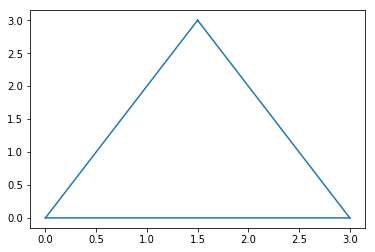

In [25]:
x = [0,  3 , 1.5]
y = [0,  0 ,  3 ]
triangles = [ [0,1,2] ]
boundary = [[0,1], [1,2], [2,0]]
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

Observe that $x$ and $y$ are the vetices coordinates. They trivially induce an order on the vertices i.e. vertex $0$ is at $(0,0)$, vertex $1$ is at $(3,0)$ and vertex $2$ is at $(1.5,3)$. Following this naming, we can specify triangles as $[0,1,2]$ where entries are the vertices in anticlockwise order. The same holds for edges and in particular for boundary edges. Now, when calling our function on these values we obtain:

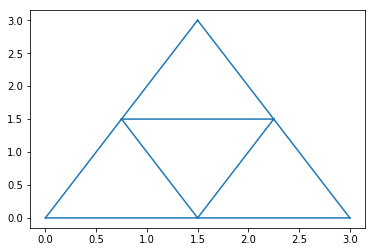

In [26]:
x, y, triangles, boundary = red_refinement(x, y, triangles, boundary)
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

The new vertices are at the middle points of the original vertices. This is red refinement. Observe that our coordinates now are:

In [27]:
vstack((x, y))

array([[0.  , 0.75, 1.5 , 1.5 , 2.25, 3.  ],
       [0.  , 1.5 , 0.  , 3.  , 1.5 , 0.  ]])

We respect to this order on the vertices coordinates, the new four triangles are:

In [28]:
triangles

[[0, 2, 1], [5, 4, 2], [3, 1, 4], [1, 2, 4]]

and the six boundary edges are:

In [29]:
boundary

[[3, 1], [1, 0], [0, 2], [2, 5], [5, 4], [4, 3]]

Now, let's run our function one more time.

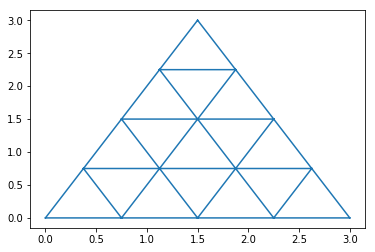

In [30]:
x, y, triangles, boundary = red_refinement(x, y, triangles, boundary)
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

One last time:

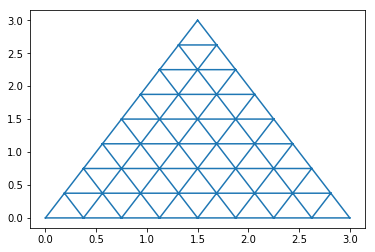

In [31]:
x, y, triangles, boundary = red_refinement(x, y, triangles, boundary)
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

Observe that our function handles other domains as well. For example, a square:

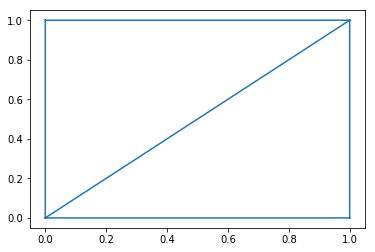

In [32]:
x = [0,  1 , 0, 1]
y = [0,  0 , 1, 1]
triangles = [ [0,3,2], [0,1,3] ]
boundary = [[0,1], [1,3], [2,0], [2,3]]
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

In [33]:
for i in range(4):
    x, y, triangles, boundary = red_refinement(x, y, triangles, boundary)
    triang = tri.Triangulation(x, y, triangles)
    

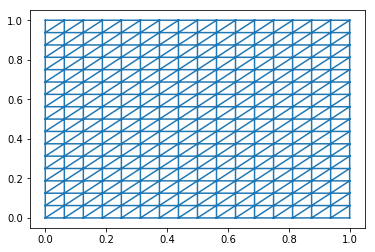

In [34]:
plt.triplot(triang)

Observe that 5 refinement iterations take already some time to complete. This is just a naive impletation for the red refinement. It clear that we can improve it to get better results. 

This implementation can handle L-shaped domains as well:

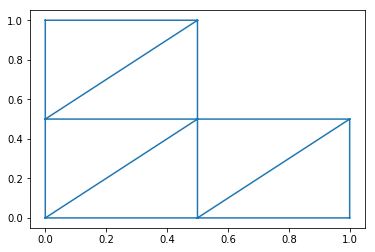

In [35]:
x = [0, .5, 1 ,  0, .5,  1, 0, .5]
y = [0,  0, 0 , .5, .5, .5, 1, 1]
triangles = [ [0,1,4], [1,2,5], [0,4,3], [1,5,4], [3,4,7], [3,7,6] ]
boundary = [[0,1], [1,2], [2,5], [4,5],[4,7],[6,7],[3,6],[0,3]]
triang = tri.Triangulation(x, y, triangles)
plt.triplot(triang)

In [36]:
for i in range(3):
    x, y, triangles, boundary = red_refinement(x, y, triangles, boundary)
    triang = tri.Triangulation(x, y, triangles)    

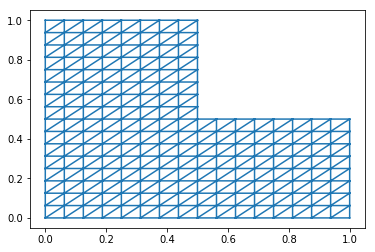

In [37]:
plt.triplot(triang)

## Finite element over a triangle domain 

This finite element implementation is based on J. Alberty, C. Carstensen & S.A. Funken. Remarks around 50 lines of Matlab. I used the same functions from their example so I can compare when running their code on Matlab. This is the domain their using

In [38]:
x = [0, 1, 1.59, 2, 3, 3, 3, 2, 1, 0,0,0,1,1,2]
y = [0,0, 0, 1   ,1.41,2,3, 3, 3, 3, 2,1,1,2,2]

triangles = [[1,2,12], [2,3,12], [3,4,14], [4,5,14]]
boundary = [[2,3], [3, 4], [6,7], [7,8], [8,9], [9,10],
             [10,11], [11,0]]  
triang = tri.Triangulation(x, y, triangles)

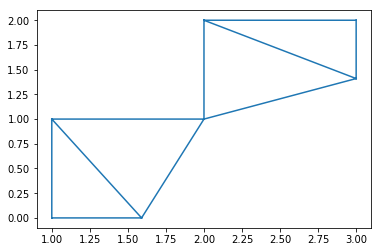

In [39]:
plt.triplot(triang)

First we transform domain data into arrays. Also, we initialize variables. 

In [148]:
coordinates = asarray(column_stack((x,y)))
elements = asarray(vstack((triangles)))
dirichlet = asarray(vstack((boundary)))
neumann = array([[4,5],[5,6],[0,1],[4,1]])

FreeNodes=setdiff1d(asarray([range((size(coordinates,0)))]),unique(dirichlet))
A = zeros((size(coordinates,0),size(coordinates,0)))
b = zeros((size(coordinates,0),1))



Assembly of stiffness matrix

This is the function that calculates the stiffness matrix

In [149]:
# Stiffness Matrix
def stifmatrix(vertices):
  d = 2;  
  A =  vstack((ones((1,d+1)),transpose(vertices)) );
  b =  vstack((zeros((1,d)),eye(2)));
  G =  solve(A, b);
  M =  det(A)*G@transpose(G)/2 
  return M





We need a for loop to do the assembling

In [150]:

# Assembly
A = zeros((size(coordinates,0),size(coordinates,0)))
for j in range(size(elements,0)):
    A[c_[elements[j,:]], elements[j,:]]= A[c_[elements[j,:]], elements[j,:]] + stifmatrix(coordinates[elements[j,:],:])


Incorporating forcing term

In [154]:
# Volume Forces
for j in range(size(elements,0)):
    b[elements[j,:]] =  b[elements[j,:]] + det(vstack(( [1,1,1] ,transpose(coordinates[elements[j,:],:]) )) )*ones((len([sum(coordinates[elements[j,:],:],0)]),1))/6       
    
b;

Incorporating Dirichlet Boundary conditions

In [152]:
# Dirichlet conditions
u = zeros((size(coordinates,0),1))
u[unique(dirichlet)] = zeros((size(coordinates[unique(dirichlet)],0),1))
b = b - A@u 

Solving linear system

In [136]:
solve(A[:,FreeNodes][FreeNodes,:],b[FreeNodes])

LinAlgError: Matrix is singular.

I do not see where is the problem since individually I am reproducing the same results as in Matlab. However, matrix A results singular here. 

I would like to finish this assignment because I really want to know how to implement finite element. Also, I spent a lot of time working on this just to not finish it.  However, I have been  panicking about the deadline and I can not get anything working properly. 

I will continue working on my notebook during the rest of reading week.